### Part 1: Ocean Optics Spectrograph ###


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator

# Reading in Hydrogen Data
folder_path = ""
file_list = [
    "hy15 (1).txt",
    "hy15 (2).txt",
    "hy15 (3).txt",
    "hy15 (4).txt",
    "hy15 (5).txt",
    "hy15 (6).txt",
    "hy15 (7).txt",
    "hy15 (8).txt",
    "hy15 (9).txt",
    "hy15 (10).txt",
]

# Initialize an empty list to store data
all_data = []

# Read each file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Locate the line where spectral data starts
    start_idx = next(i for i, line in enumerate(lines) if line.strip() == ">>>>>Begin Spectral Data<<<<<") + 1
    
    # Read the spectral data
    spectral_data = [line.strip().split() for line in lines[start_idx:] if line.strip()]
    
    # Convert to DataFrame
    df = pd.DataFrame(spectral_data, columns=["Wavelength", "Intensity"], dtype=float)
    all_data.append(df)

# Concatenate all data into a single DataFrame
combined_data = pd.concat(all_data)

# Group by Wavelength and calculate the average intensity
hydrogen_data = combined_data.groupby("Wavelength", as_index=False).mean()

# Save or display the result
print(hydrogen_data.head())
hydrogen_data.to_csv("hydrogen_data.csv", index=False)


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [12]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [9]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hydrogen_data["Wavelength"], hydrogen_data["Intensity"], label="Hydrogen Spectrum")
plt.title("Spectrum of Hydrogen Lamp")
plt.xlabel("Wavelength [NM]")
plt.ylabel("ADC Value [ADC]")

plt.grid(True)
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Reading in Dark Data
folder_path = ""
file_list = [
    "dark (1).txt",
    "dark (2).txt",
    "dark (3).txt",
    "dark (4).txt",
    "dark (5).txt",
    "dark (6).txt",
    "dark (7).txt",
    "dark (8).txt",
    "dark (9).txt",
    "dark (10).txt"
]

# Initialize an empty list to store data
all_data = []

# Read each file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Locate the line where spectral data starts
    start_idx = next(i for i, line in enumerate(lines) if line.strip() == ">>>>>Begin Spectral Data<<<<<") + 1
    
    # Read the spectral data
    spectral_data = [line.strip().split() for line in lines[start_idx:] if line.strip()]
    
    # Convert to DataFrame
    df = pd.DataFrame(spectral_data, columns=["Wavelength", "Intensity"], dtype=float)
    all_data.append(df)

# Concatenate all data into a single DataFrame
combined_data = pd.concat(all_data)

# Group by Wavelength and calculate the average intensity
dark_data = combined_data.groupby("Wavelength", as_index=False).mean()

# Save or display the result
print(dark_data.head())
dark_data.to_csv("dark_data.csv", index=False)


   Wavelength  Intensity
0       350.0      0.425
1       351.0      0.252
2       352.0     -0.675
3       353.0     -0.062
4       354.0      0.058


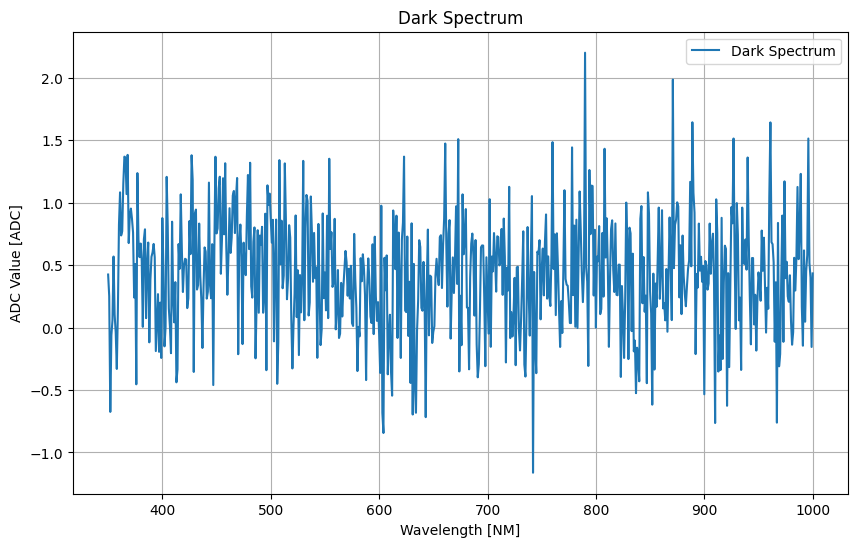

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dark_data["Wavelength"], dark_data["Intensity"], label="Dark Spectrum")
plt.title("Dark Spectrum")
plt.xlabel("Wavelength [NM]")
plt.ylabel("ADC Value [ADC]")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Reading in Ambient 
folder_path = ""
file_list = [
    "amb2 (1).txt",
    "amb2 (2).txt",
    "amb2 (3).txt",
    "amb2 (4).txt",
    "amb2 (5).txt",
    "amb2 (6).txt",
    "amb2 (7).txt",
    "amb2 (8).txt",
    "amb2 (9).txt",
    "amb2 (10).txt"
]

# Initialize an empty list to store data
all_data = []

# Read each file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Locate the line where spectral data starts
    start_idx = next(i for i, line in enumerate(lines) if line.strip() == ">>>>>Begin Spectral Data<<<<<") + 1
    
    # Read the spectral data
    spectral_data = [line.strip().split() for line in lines[start_idx:] if line.strip()]
    
    # Convert to DataFrame
    df = pd.DataFrame(spectral_data, columns=["Wavelength", "Intensity"], dtype=float)
    all_data.append(df)

# Concatenate all data into a single DataFrame
combined_data = pd.concat(all_data)

# Group by Wavelength and calculate the average intensity
amb_data = combined_data.groupby("Wavelength", as_index=False).mean()

# Save or display the result
print(amb_data.head())
amb_data.to_csv("amb_data.csv", index=False)


   Wavelength  Intensity
0       350.0      0.148
1       351.0     -0.016
2       352.0     -0.725
3       353.0     -0.101
4       354.0      0.695


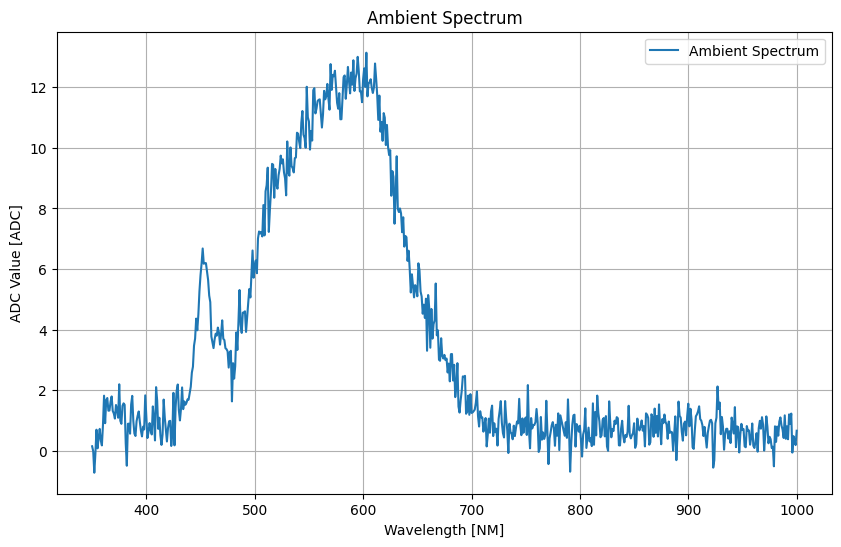

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(amb_data["Wavelength"], amb_data["Intensity"], label="Ambient Spectrum")
plt.title("Ambient Spectrum")
plt.xlabel("Wavelength [NM]")
plt.ylabel("ADC Value [ADC]")
plt.grid(True)
plt.legend()
plt.show()

   Wavelength  Corrected_Intensity
0       350.0               -0.053
1       351.0               -0.399
2       352.0                0.639
3       353.0                0.635
4       354.0               -0.824


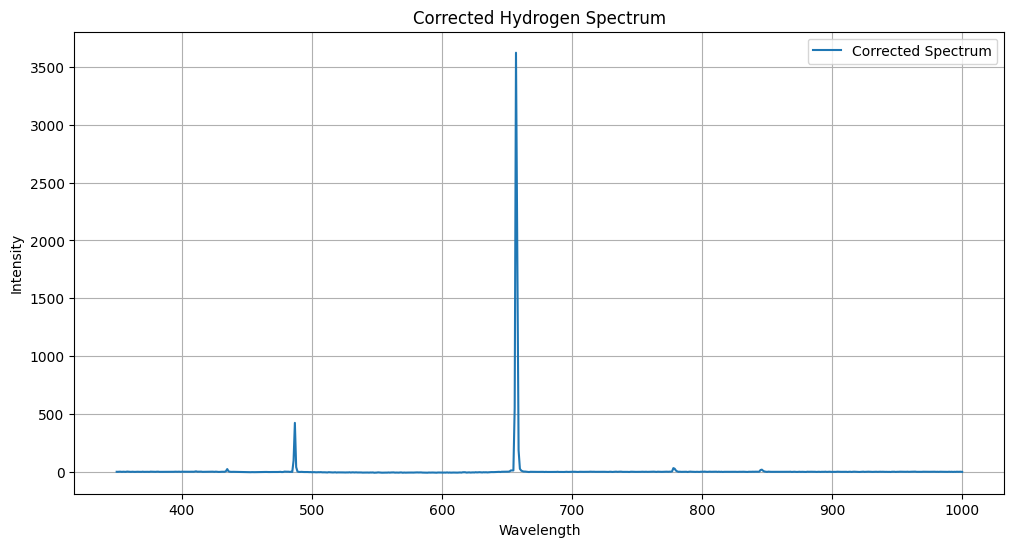

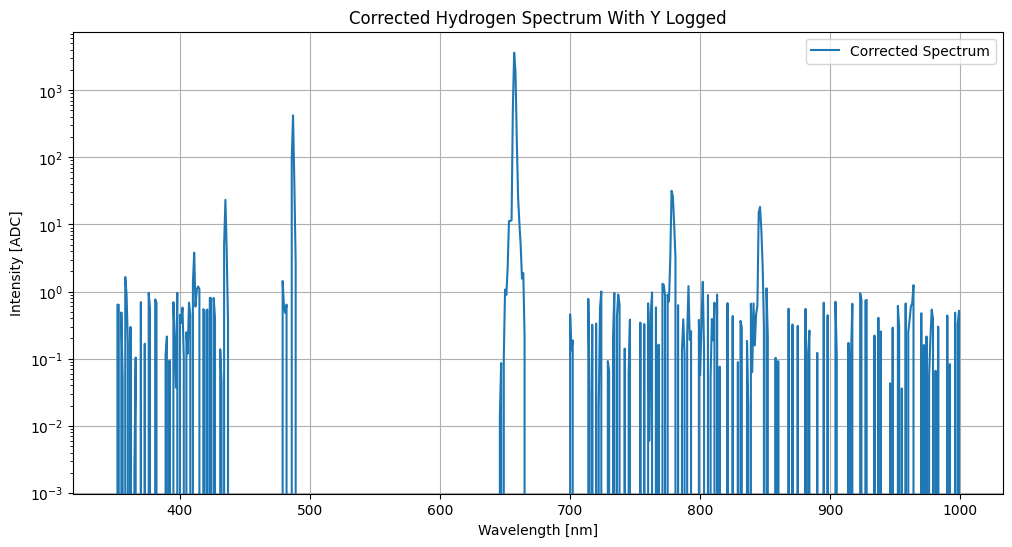

In [7]:
import pandas as pd

# Load the hydrogen data and dark data
hydrogen_data = pd.read_csv("hydrogen_data.csv")  # Replace with your actual file
amb_data = pd.read_csv("amb_data.csv")  # Replace with your actual file

# Merge the two datasets on the 'Wavelength' column
merged_data = pd.merge(hydrogen_data, amb_data, on="Wavelength", suffixes=("_hydrogen", "_dark"))

# Subtract dark intensity from hydrogen intensity
merged_data["Corrected_Intensity"] = merged_data["Intensity_hydrogen"] - merged_data["Intensity_dark"]

# Save or display the corrected data
averaged_data = merged_data[["Wavelength", "Corrected_Intensity"]]
print(averaged_data.head())
averaged_data.to_csv("corrected_spectral_data.csv", index=False)

# Optional: Plot the corrected spectrum
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(averaged_data["Wavelength"], averaged_data["Corrected_Intensity"], label="Corrected Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

plt.title("Corrected Hydrogen Spectrum")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(averaged_data["Wavelength"], averaged_data["Corrected_Intensity"], label="Corrected Spectrum")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [ADC]")
plt.semilogy()
plt.title("Corrected Hydrogen Spectrum With Y Logged")
plt.legend()
plt.grid()
plt.show()

In [8]:
from scipy.signal import find_peaks
# Find peaks in the Final_Averaged_Intensity
intensity = averaged_data["Corrected_Intensity"]
peaks, _ = find_peaks(intensity, height=3.5)

# Display peaks and their wavelengths
peak_wavelengths = averaged_data.iloc[peaks]["Wavelength"]
peak_intensities = averaged_data.iloc[peaks]["Corrected_Intensity"]
print("Peak Wavelengths:")
print(peak_wavelengths)
print("Peak Intensities:")
print(peak_intensities)

Peak Wavelengths:
61     411.0
85     435.0
137    487.0
307    657.0
428    778.0
496    846.0
Name: Wavelength, dtype: float64
Peak Intensities:
61        3.800
85       23.288
137     422.762
307    3622.449
428      31.724
496      18.260
Name: Corrected_Intensity, dtype: float64


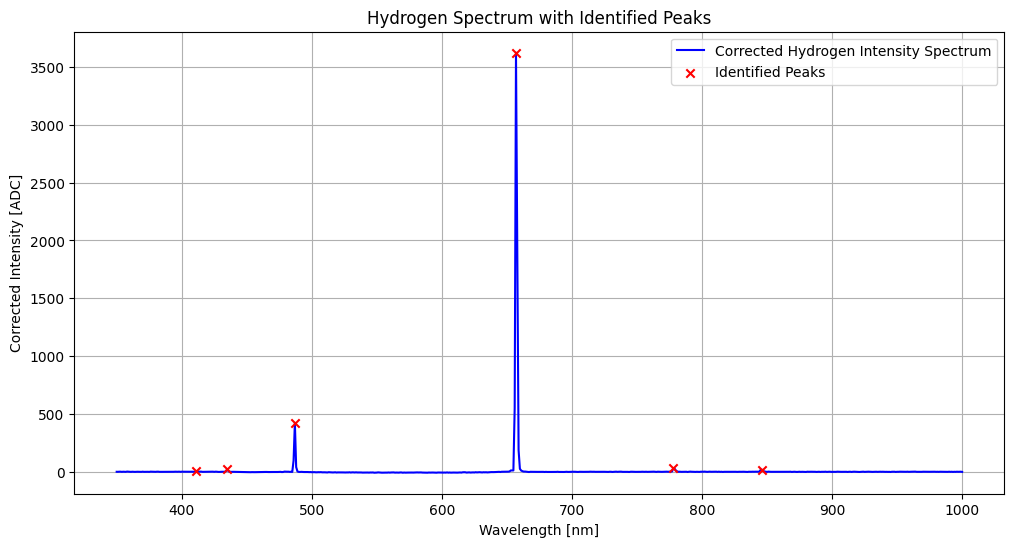

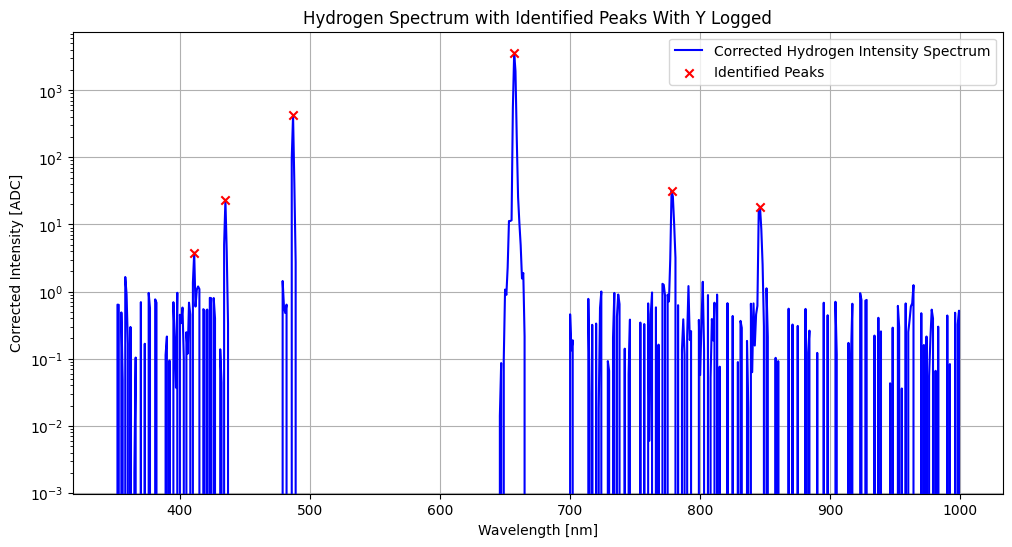

In [9]:
import matplotlib.pyplot as plt

# Plot the spectrum
plt.figure(figsize=(12, 6))
plt.plot(averaged_data["Wavelength"], intensity, label="Corrected Hydrogen Intensity Spectrum", color="blue")

# Highlight the peaks
plt.scatter(peak_wavelengths, peak_intensities, color="red", marker='x', label="Identified Peaks", zorder=5)

# Add labels, title, and legend
plt.xlabel("Wavelength [nm]")
plt.ylabel("Corrected Intensity [ADC]")
plt.title("Hydrogen Spectrum with Identified Peaks")
plt.legend()
plt.grid()
plt.show()

# Plot the spectrum
plt.figure(figsize=(12, 6))
plt.plot(averaged_data["Wavelength"], intensity, label="Corrected Hydrogen Intensity Spectrum", color="blue")

# Highlight the peaks
plt.scatter(peak_wavelengths, peak_intensities, color="red", marker='x', label="Identified Peaks", zorder=5)

# Add labels, title, and legend
plt.xlabel("Wavelength [nm]")
plt.ylabel("Corrected Intensity [ADC]")
plt.title("Hydrogen Spectrum with Identified Peaks With Y Logged")
plt.semilogy()
plt.legend()
plt.grid()
plt.show()

In [11]:
# Centroid Finding Function
def centroid(x, I):
  return np.sum(x*I)/np.sum(I)

peaks = peaks[:-2]

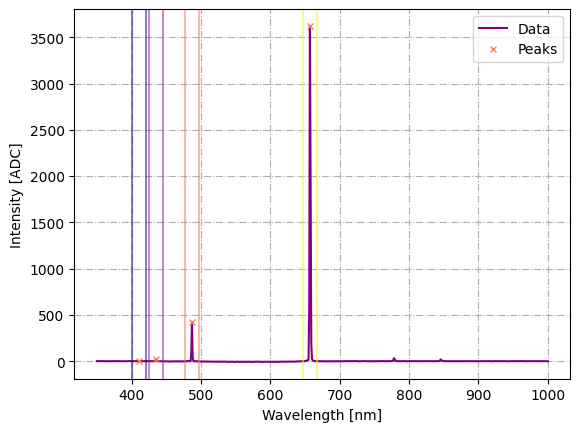

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.figure()

# Dynamically create the colormap for the number of peaks being plotted
colours_t = cm.plasma(np.linspace(0, 1, min(10, len(peaks))))

range_val = 10

wavelength = averaged_data["Wavelength"]

# Plot the main data
plt.plot(wavelength, intensity, color='purple', label='Data')

# Plot the peaks
plt.plot(wavelength[peaks], intensity[peaks], color='coral', ls='', marker='x', ms=5, label='Peaks')

# Add vertical lines to indicate ranges around the peaks
for i in range(len(peaks[:10])):
    # Ensure indices are within bounds
    lower_bound = max(0, peaks[i] - range_val)
    upper_bound = min(len(wavelength) - 1, peaks[i] + range_val)
    
    # Plot vertical lines for the range
    plt.axvline(wavelength[lower_bound], color=colours_t[i], alpha=0.5)
    plt.axvline(wavelength[upper_bound], color=colours_t[i], alpha=0.5)

# Add labels, legend, and grid
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [ADC]')
plt.legend(loc='best', fontsize=10)
plt.grid(ls='-.')
plt.show()


In [16]:
centroids = [centroid(wavelength[peaks[i]-range_val:peaks[i]+range_val], intensity[peaks[i]-range_val:peaks[i]+range_val]) for i in range(len(peaks))]

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jinha\AppData\Local\Temp\ipykernel_18004\3243078523.py:42: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x_fine, y_fit, 'r--', label=f'Gaussian Fit\n$\mu={mu_fit:.2f}, \sigma={sigma_fit:.2f}, a={a_fit:.2f}$')
C:\Users\jinha\AppData\Local\Temp\ipykernel_18004\3243078523.py:42: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(x_fine, y_fit, 'r--', label=f'Gaussian Fit\n$\mu={mu_fit:.2f}, \sigma={sigma_fit:.2f}, a={a_fit:.2f}$')


61
85
137
307
[410.86405471 434.96787524 486.88565482 657.24888423]


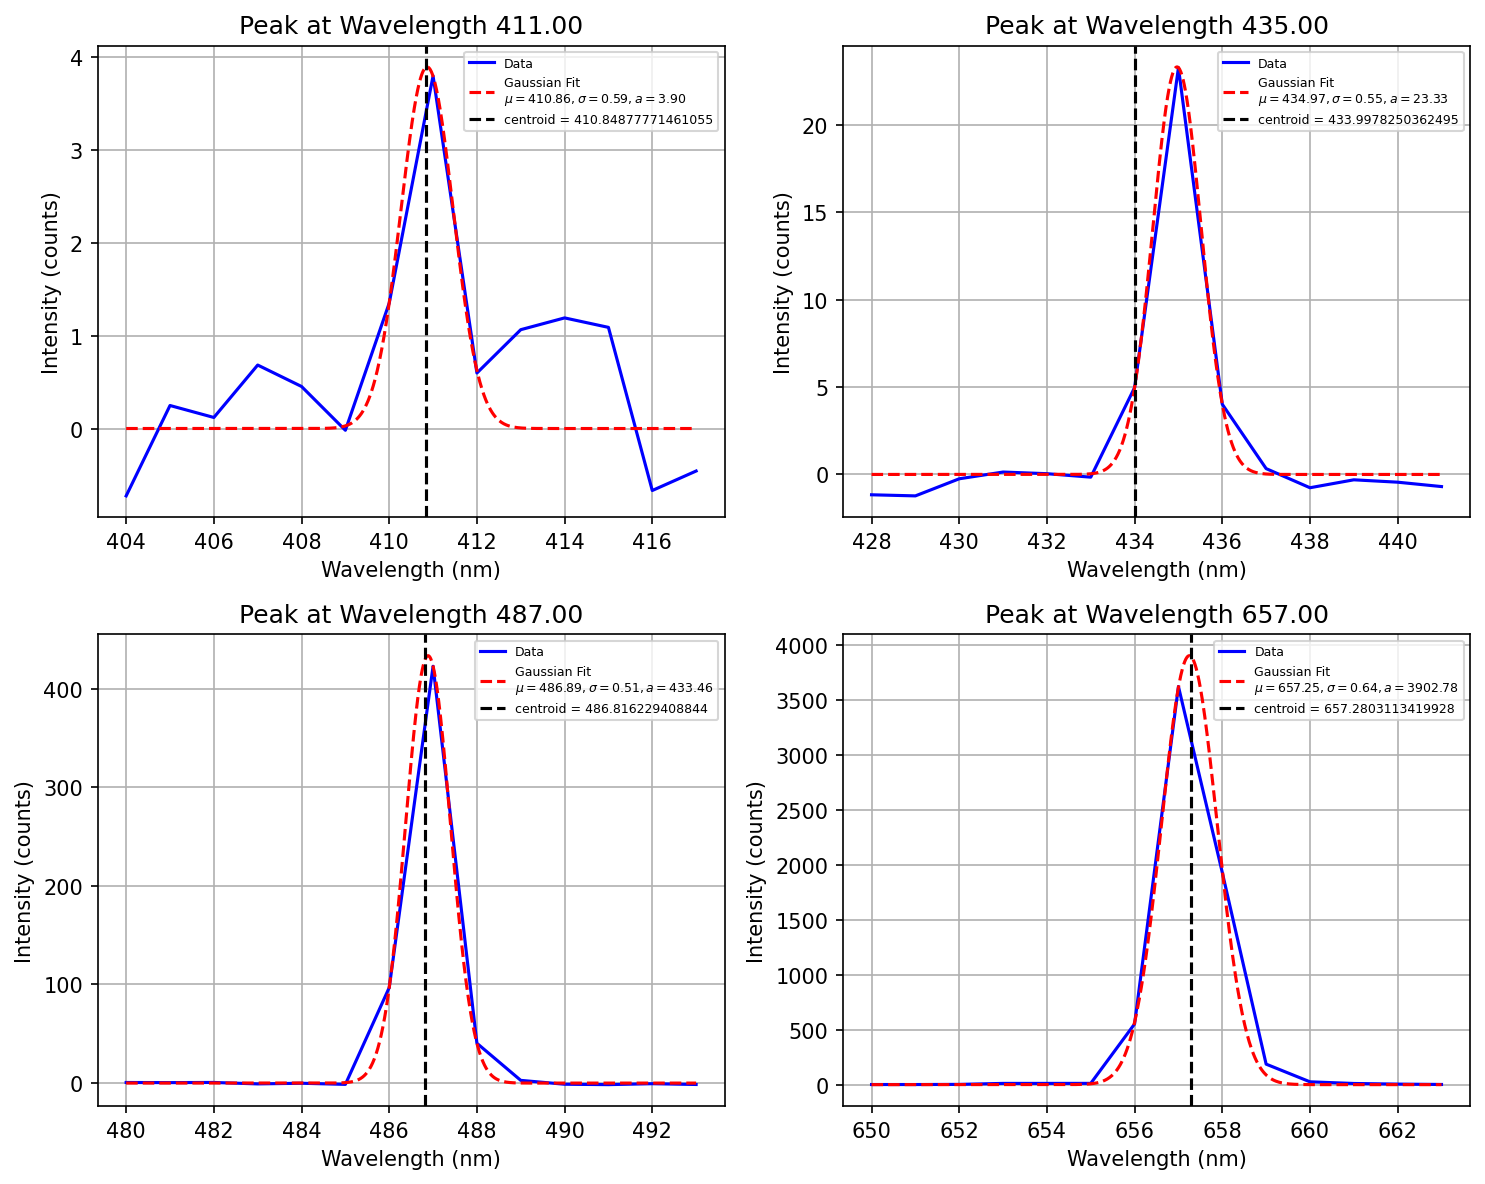

In [18]:
# find errors

peak_uncertainties = []
gaussian_peaks = []
def gaussian_fit(x, mu, sigma, a):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

wavelengths = np.linspace(350,1000,651)
intensities = intensity
# Peak regions for Gaussian fitting


fit_width = 7  # Number of points to either side of the peak for fitting
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi = 150)
axes = axes.flatten()  # Flatten axes array for easier indexing
for i in range(len(peaks)):
    # Extract data around the peak
    peak_index = peaks[i]
    start = int(max(0, peak_index - fit_width))
    end = int(min(len(wavelengths), peak_index + fit_width))
    
    x_data = np.array(wavelengths[start:end])
    y_data = np.array(intensities[start:end])
    
    # Initial parameters guesses
    print(peak_index)
    mu_guess = wavelengths[peak_index]
    sigma_guess = 2
    a_guess = intensities[peak_index]
    
    p0 = [mu_guess, sigma_guess, a_guess]
    
    try:  # Fit Gaussian to the data
        popt, pcov = curve_fit(gaussian_fit, x_data, y_data, p0=p0)
        mu_fit, sigma_fit, a_fit = popt
        peak_uncertainties.append(sigma_fit)
        gaussian_peaks.append(mu_fit)
        x_fine = np.linspace(x_data[0], x_data[-1], 1000)
        y_fit = gaussian_fit(x_fine, mu_fit, sigma_fit, a_fit)
        ax = axes[i]
        ax.plot(x_data, y_data, 'b-', label='Data')
        ax.plot(x_fine, y_fit, 'r--', label=f'Gaussian Fit\n$\mu={mu_fit:.2f}, \sigma={sigma_fit:.2f}, a={a_fit:.2f}$')
        ax.set_title(f'Peak at Wavelength {mu_guess:.2f}')
        ax.set_xlabel('Wavelength (nm)')
        ax.set_ylabel('Intensity (counts)')
        ax.legend(loc = 'upper right')
        ax.grid(True)
        ax.axvline(centroids[i], color = 'black', linestyle = '--', label = f'centroid = {centroids[i]}')
        ax.legend(loc = 'best', fontsize = 6)
    except RuntimeError:
        print(f"Could not fit Gaussian to peak at index {peak_index}")
        axes[i].set_title(f"Fit failed at peak {peak_index}")
        axes[i].grid(True)
    
peak_uncertainties = np.array(peak_uncertainties)
gaussian_peaks = np.array(gaussian_peaks)
print(gaussian_peaks)
plt.tight_layout()
plt.show()

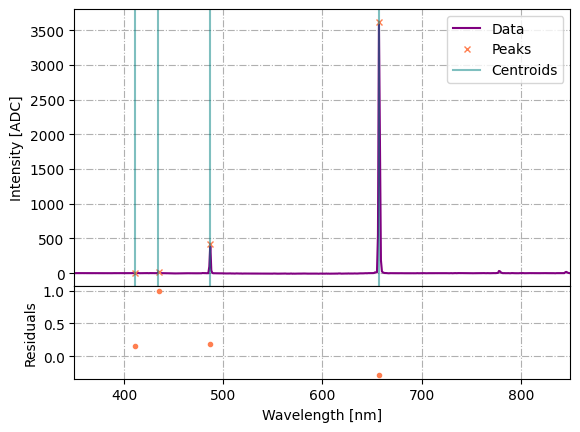

In [20]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace = 0.0)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)

ax0.plot(wavelength, intensity, color = 'purple', label = 'Data')
ax0.plot(wavelength[peaks], intensity[peaks], color = 'coral', ls = '', marker = 'x',
         ms = 5, label = 'Peaks')

[ax0.axvline(c, color = 'teal', alpha = 0.5, label = 'Centroids') if c == centroids[0]
 else ax0.axvline(c, color = 'teal', alpha = 0.5) for c in centroids]

ax1.plot(wavelength[peaks], wavelength[peaks] - centroids, ls = '', marker = '.', color = 'coral')

ax1.set_xlabel('Wavelength [nm]')
ax0.set_ylabel('Intensity [ADC]')
ax1.set_ylabel('Residuals')

plt.setp(ax0.get_xticklabels(), visible = False)

ax0.legend(loc = 'best', fontsize = 10)
ax0.grid(ls = '-.')
ax1.grid(ls = '-.')
plt.xlim((350, 850))
plt.show()

In [21]:
known_peaks = [410.174, 434.046, 486.136, 656.285]
centroids = np.array(centroids)

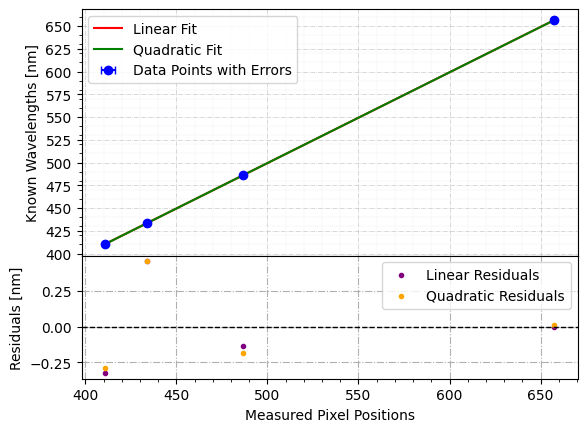

Linear Fit Parameters: Slope = 0.997392442737313, Intercept = 0.7210349107666216


In [24]:
# Linear fit model
def linear_model(x, m, b):
    return m * x + b

x_uncertainties = np.array([0.59,0.55,0.51,0.64])  # x-uncertainties

# Fit the linear model
popt_linear, _ = curve_fit(linear_model, centroids, known_peaks)
# Extract slope and intercept
slope, intercept = popt_linear

# Perform quadratic fitting
quadratic_fit = np.polyfit(centroids, known_peaks, 2)  # Degree 2
quadratic_poly = np.poly1d(quadratic_fit)  # Quadratic polynomial
y_fit_quadratic = quadratic_poly(centroids)
quad_residuals = known_peaks - y_fit_quadratic
# Generate fitted values
fitted = linear_model(centroids, slope, intercept)

# Calculate residuals
residuals = known_peaks - fitted

# Set up figure and grid spec for subplots
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.0)
# Outer grid: 1x1 (only one set of plots)
outer_grid = gridspec.GridSpec(1, 1)

# Inner grid: 2x1 (fit and residuals stacked)
inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2, 1],
                                              subplot_spec=outer_grid[0],
                                              hspace=0.0)
# Add subplots for the fit and residuals
ax0 = fig.add_subplot(inner_grid[0])  # Top subplot (fit)
ax1 = fig.add_subplot(inner_grid[1], sharex=ax0)  # Bottom subplot (residuals)
ax0.grid(ls='-.', linewidth=0.5, alpha=0.7)  # Major gridlines
ax0.yaxis.set_major_locator(MultipleLocator(25))  # Major y-ticks every 50
ax0.xaxis.set_major_locator(MultipleLocator(50))  # Major x-ticks every 50
ax0.yaxis.set_minor_locator(MultipleLocator(10))  # Minor y-ticks every 10
ax0.xaxis.set_minor_locator(MultipleLocator(10))  # Minor x-ticks every 10
ax0.grid(which='minor', ls=':', linewidth=0.3, alpha=0.5)  # Minor gridlines

# Plot data points and linear fit on the first axis
ax0.errorbar(centroids, known_peaks, xerr=x_uncertainties, fmt='o', color='blue', 
             label='Data Points with Errors', capsize=3)
ax0.plot(centroids, fitted, color='red', label='Linear Fit')
ax0.plot(centroids, y_fit_quadratic, color='green', label = 'Quadratic Fit')

# Customize axis labels and grid
ax0.set_ylabel('Known Wavelengths [nm]')
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.legend(loc='best', fontsize=10)
ax0.grid(ls='-.')

# Plot residuals on the second axis
ax1.scatter(centroids, residuals, color='purple', label='Linear Residuals', marker='.')
ax1.scatter(centroids, quad_residuals, color='orange', label='Quadratic Residuals', marker='.')
ax1.axhline(0, color='black', linestyle='--', linewidth=1)
ax1.set_xlabel('Measured Pixel Positions')
ax1.set_ylabel('Residuals [nm]')
ax1.grid(ls='-.')
ax1.legend()
# Show plot
plt.show()


# Print linear fit parameters
print(f"Linear Fit Parameters: Slope = {popt_linear[0]}, Intercept = {popt_linear[1]}")


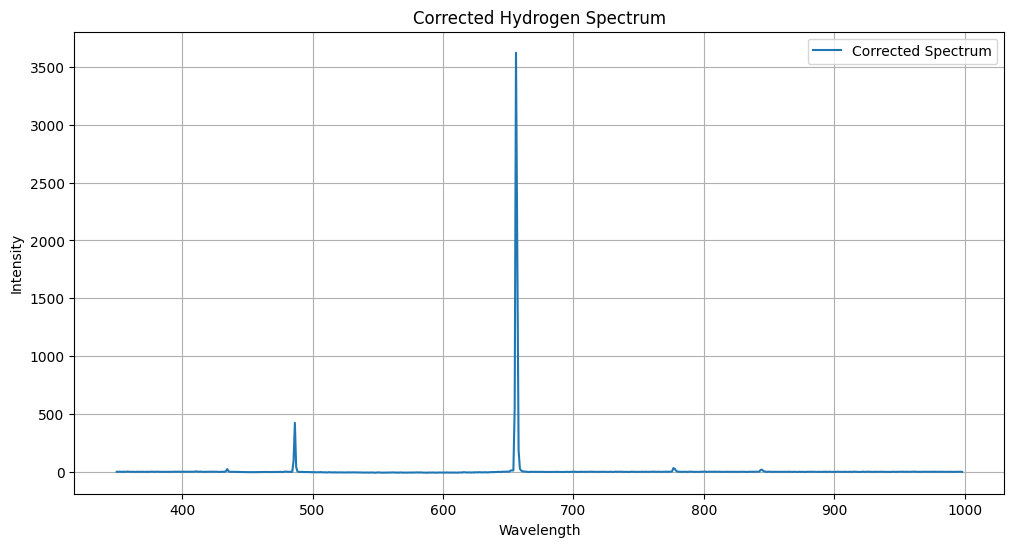

In [26]:
wavelength_calibrated = wavelength * popt_linear[0] + intercept

# Find peaks in the Final_Averaged_Intensity
intensity = averaged_data["Corrected_Intensity"]
peaks, _ = find_peaks(intensity, height=3.5)
peak_wavelengths_calibrated = []
for i in peaks:
    peak_wavelengths_calibrated.append(wavelength_calibrated[i])
peak_intensities = averaged_data.iloc[peaks]["Corrected_Intensity"]

plt.figure(figsize=(12, 6))
plt.plot(wavelength_calibrated, averaged_data["Corrected_Intensity"], label="Corrected Spectrum")
# Highlight the peaks

plt.xlabel("Wavelength")
plt.ylabel("Intensity")

plt.title("Corrected Hydrogen Spectrum")
plt.legend()
plt.grid()
plt.show()

In [209]:
def chi2_fit(x: list, y: list, maxdeg: int):
# return a list of chi2 to seek the best deg of fitting
    chi2_list = []
    for i in range(1,maxdeg+1):
        coe = np.polyfit(x, y, i)
        model = np.polyval(coe, x)
        sigma = np.std(y - model)
        chi2 = np.sum((y - model) ** 2 / sigma ** 2)
        chi2_list.append(chi2)
        
    return chi2_list
    

# apply to h2
h2_fit = chi2_fit(centroids, known_peaks, 4)
print('The first few χ² found is', '\nn=1:', h2_fit[0], '\nn=2:', h2_fit[1], '\nn=3:',h2_fit[2], '\nn=4:', h2_fit[3])

The first few χ² found is 
n=1: 4.000000000000001 
n=2: 3.9999999999999996 
n=3: 87.05084745762713 
n=4: 4.71840354767184


C:\Users\jinha\AppData\Local\Temp\ipykernel_15584\1664506529.py:5: RankWarning: Polyfit may be poorly conditioned
  coe = np.polyfit(x, y, i)


In [44]:
nist_wavelength = [388.91, 410.17, 434.05, 486.13, 656.28]


In [75]:
# Reading in Hydrogen Data
folder_path = ""
file_list = [
    "neon (1).txt",
    "neon (2).txt",
    "neon (3).txt",
    "neon (4).txt",
    "neon (5).txt",
    "neon (6).txt",
    "neon (7).txt",
    "neon (8).txt",
    "neon (9).txt",
    "neon (10).txt"
]

# Initialize an empty list to store data
all_data = []

# Read each file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Locate the line where spectral data starts
    start_idx = next(i for i, line in enumerate(lines) if line.strip() == ">>>>>Begin Spectral Data<<<<<") + 1
    
    # Read the spectral data
    spectral_data = [line.strip().split() for line in lines[start_idx:] if line.strip()]
    
    # Convert to DataFrame
    df = pd.DataFrame(spectral_data, columns=["Wavelength", "Intensity"], dtype=float)
    all_data.append(df)

# Concatenate all data into a single DataFrame
combined_data = pd.concat(all_data)

# Group by Wavelength and calculate the average intensity
neon_data = combined_data.groupby("Wavelength", as_index=False).mean()

# Save or display the result
print(neon_data.head())
neon_data.to_csv("neon_data.csv", index=False)


   Wavelength  Intensity
0       350.0     -0.622
1       351.0     -0.149
2       352.0      0.667
3       353.0      0.247
4       354.0     -0.146


   Wavelength  Corrected_Intensity
0       350.0               -0.770
1       351.0               -0.133
2       352.0                1.392
3       353.0                0.348
4       354.0               -0.841


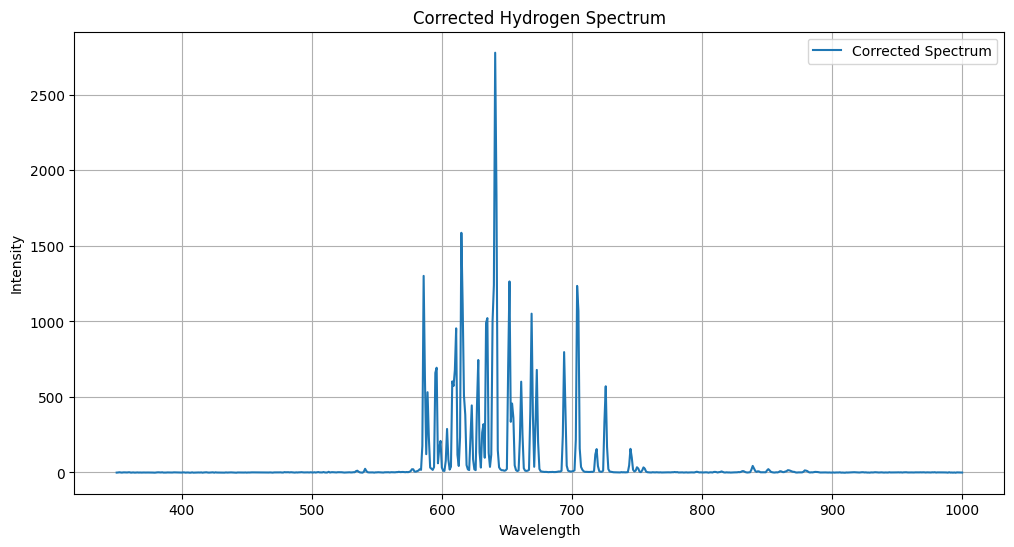

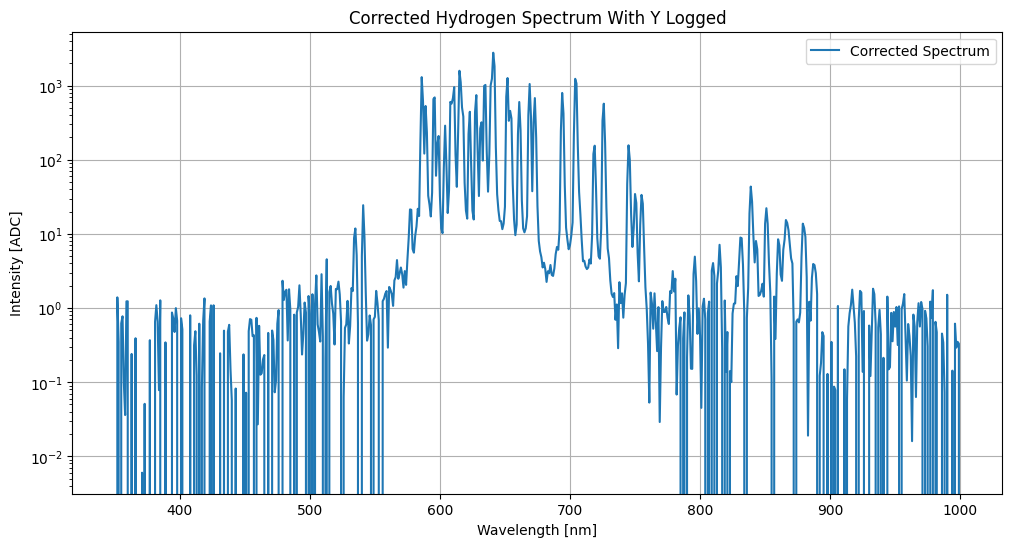

In [76]:
import pandas as pd

# Load the hydrogen data and dark data
neon_data = pd.read_csv("neon_data.csv")  # Replace with your actual file
amb_data = pd.read_csv("amb_data.csv")  # Replace with your actual file

# Merge the two datasets on the 'Wavelength' column
merged_data = pd.merge(neon_data, amb_data, on="Wavelength", suffixes=("_hydrogen", "_dark"))

# Subtract dark intensity from hydrogen intensity
merged_data["Corrected_Intensity"] = merged_data["Intensity_hydrogen"] - merged_data["Intensity_dark"]

# Save or display the corrected data
averaged_neon_data = merged_data[["Wavelength", "Corrected_Intensity"]]
print(averaged_neon_data.head())
averaged_neon_data.to_csv("corrected_spectral_data.csv", index=False)

# Optional: Plot the corrected spectrum
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(averaged_neon_data["Wavelength"], averaged_neon_data["Corrected_Intensity"], label="Corrected Spectrum")
plt.xlabel("Wavelength")
plt.ylabel("Intensity")

plt.title("Corrected Hydrogen Spectrum")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(averaged_neon_data["Wavelength"], averaged_neon_data["Corrected_Intensity"], label="Corrected Spectrum")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Intensity [ADC]")
plt.semilogy()
plt.title("Corrected Hydrogen Spectrum With Y Logged")
plt.legend()
plt.grid()
plt.show()

In [77]:
from scipy.signal import find_peaks
# Find peaks in the Final_Averaged_Intensity
intensity = averaged_neon_data["Corrected_Intensity"]
peaks, _ = find_peaks(intensity, height=500)

# Display peaks and their wavelengths
neon_peak_wavelengths = averaged_neon_data.iloc[peaks]["Wavelength"]
neon_peak_intensities = averaged_neon_data.iloc[peaks]["Corrected_Intensity"]
neon_wavelength =averaged_neon_data['Wavelength']

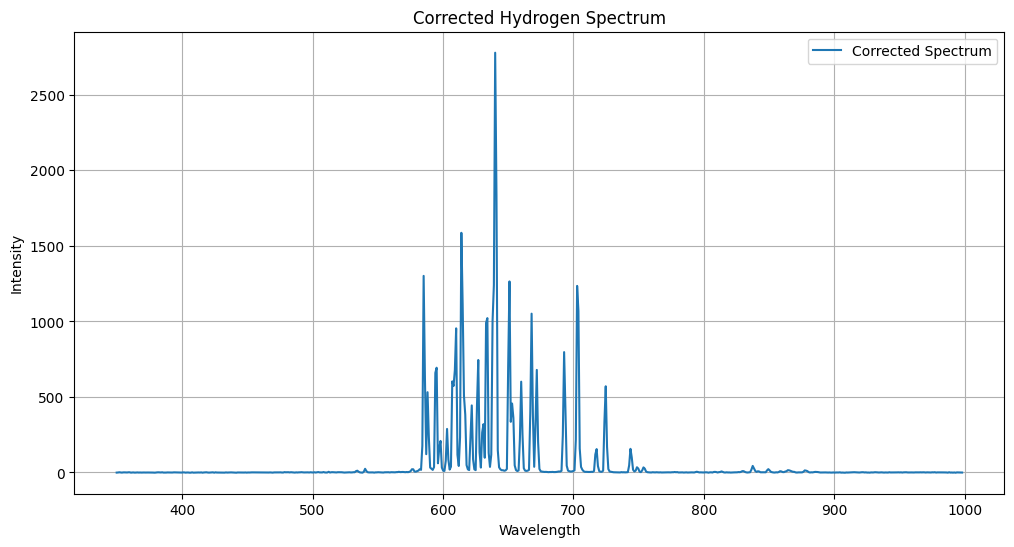

In [99]:
neon_wavelength_calibrated = neon_wavelength * popt_linear[0] + intercept

# Find peaks in the Final_Averaged_Intensity
intensity = averaged_neon_data["Corrected_Intensity"]
peaks, _ = find_peaks(intensity, height=3.5)
peak_wavelengths_calibrated = []
for i in peaks:
    peak_wavelengths_calibrated.append(neon_wavelength_calibrated[i])
peak_intensities = averaged_data.iloc[peaks]["Corrected_Intensity"]

plt.figure(figsize=(12, 6))
plt.plot(neon_wavelength_calibrated, averaged_neon_data["Corrected_Intensity"], label="Corrected Spectrum")
# Highlight the peaks

plt.xlabel("Wavelength")
plt.ylabel("Intensity")

plt.title("Corrected Hydrogen Spectrum")
plt.legend()
plt.grid()
plt.show()

In [100]:
from scipy.signal import find_peaks
# Find peaks in the Final_Averaged_Intensity
intensity = averaged_neon_data["Corrected_Intensity"]
peaks, _ = find_peaks(intensity, height=1000)

# Display peaks and their wavelengths
peak_intensities = averaged_neon_data.iloc[peaks]["Corrected_Intensity"]
print("Peak Wavelengths:")
print(neon_wavelength_calibrated[peaks])
print("Peak Intensities:")
print(peak_intensities)

Peak Wavelengths:
236    585.193006
265    614.117387
285    634.065236
291    640.049591
302    651.020908
319    667.976579
354    702.885315
Name: Wavelength, dtype: float64
Peak Intensities:
236    1301.503
265    1586.746
285    1021.802
291    2778.928
302    1264.859
319    1051.386
354    1235.161
Name: Corrected_Intensity, dtype: float64


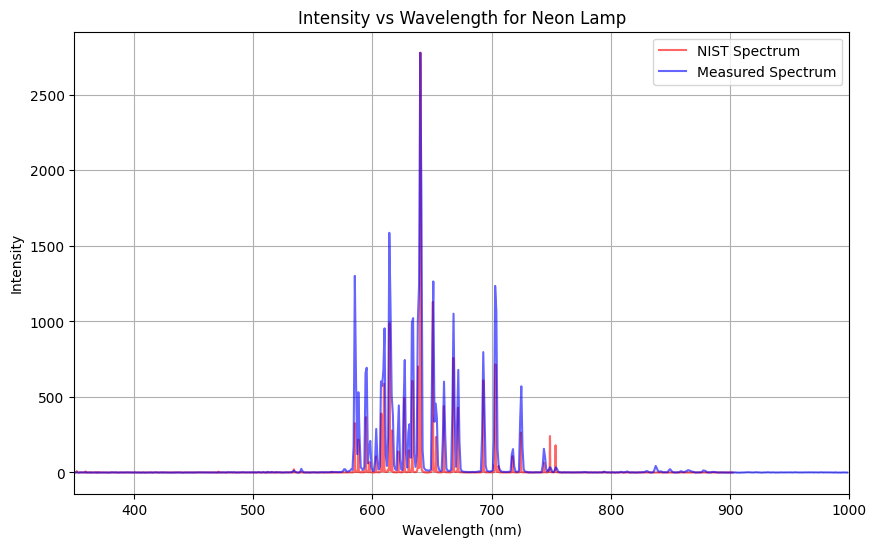

In [118]:
# Open the .asc file and read its contents
nist_wavelength = []
nist_intensity = []

data = np.loadtxt('10_NIST.asc')  # Automatically detects space or tab-separated values
for i in data:
    nist_wavelength.append(i[0])
    nist_intensity.append(i[1] * 2778)
plt.figure(figsize=(10, 6))
plt.plot(nist_wavelength, nist_intensity, linestyle='-', color='red', alpha=0.6, label='NIST Spectrum')
plt.plot(neon_wavelength_calibrated, averaged_neon_data["Corrected_Intensity"], color = 'blue',alpha=0.6, label="Measured Spectrum")

# Label the axes and give the plot a title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Intensity vs Wavelength for Neon Lamp')
plt.xlim(350,1000)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()